In [1]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt





In [2]:
import numpy as np
import json

# Day, university, time period
uni_avails = np.zeros((5, 40, 34))

with open('./data/allAvailabilities.json') as f:
    data = json.load(f)
    for uni_incr, university_code in enumerate(data):
        code = university_code
        name = data[university_code]['university']

        for ind, day in enumerate(['M', 'T', 'W', 'Th', 'F']):
            uni_avails[ind][uni_incr] = data[university_code]['isAvailable'][day]

uni_avails[0][0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [3]:
# For tabu search, start with init solution

initial_solution = np.zeros((40, 34))
initial_solution


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
initial_solution.shape

(40, 34)

neighborhood


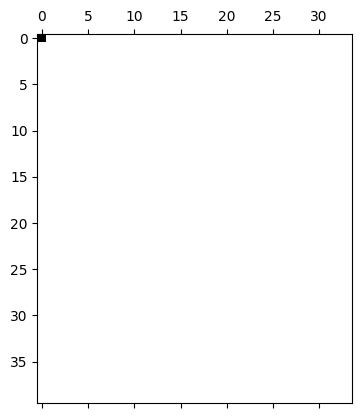

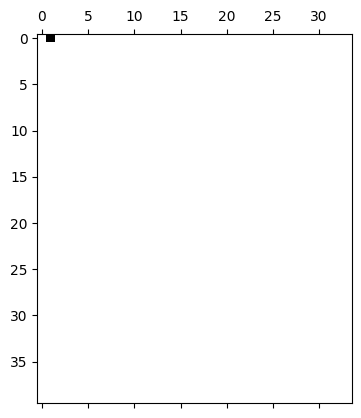

In [15]:
# The neighborhood of the solution is the set of all solutions that can be obtained by changing one element of the solution
# For the tabu search, we will consider the neighborhood of the solution as the set of all solutions that can be obtained by changing one element of the solution
def get_neighborhood(solution: np.ndarray):
    neighborhood = []
    for i in range(solution.shape[0]):
        for j in range(solution.shape[1]):
            # Ensure the change won't make the solution invalid
            if solution[i][j] == 0 and uni_avails[0][i][j] == 1:
                # On flip, this would make the solution invalid
                continue
            new_solution = np.copy(solution)
            new_solution[i][j] = 1 - new_solution[i][j]
            neighborhood.append(new_solution)

    return neighborhood


print("neighborhood")
neighorhood_1 = get_neighborhood(initial_solution)
plt.spy(neighorhood_1[0])
plt.show()
plt.spy(neighorhood_1[1])
plt.show()

In [ ]:
def get_score(solution: np.ndarray):
    # What we want is 
    return np.sum(solution)

In [16]:
import pandas as pd
import ast
def indices_to_list(indices, length):
    return [1 if i in indices else 0 for i in range(length+1)][1:]

pre_data = pd.read_csv('combinations.tsv',sep='\t')
pre_data['Chairs'] = pre_data['Chairs'].apply(ast.literal_eval)
pre_data['Members'] = pre_data['Members'].apply(ast.literal_eval)
pre_data['Chairs'] = pre_data['Chairs'].apply(lambda x: indices_to_list(x,10))
pre_data['Members'] = pre_data['Members'].apply(lambda x: indices_to_list(x,30))
pre_data['a'] = pre_data['Members'] + pre_data['Chairs']
pre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16344393 entries, 0 to 16344392
Data columns (total 5 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   Day      int64 
 1   Time     int64 
 2   Members  object
 3   Chairs   object
 4   a        object
dtypes: int64(2), object(3)
memory usage: 623.5+ MB


,Day,Time,a
0,1,1,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,1,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,1,1,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1,1,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1,1,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...
16344388,5,34,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
16344389,5,34,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
16344390,5,34,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
16344391,5,34,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
its = 0

max_its = 1000


while its < max_its:
    its += 1
    print(its)
    # Get the neighborhood of the current solution
    neighborhood = get_neighborhood(initial_solution)
    # Evaluate the neighborhood
    
    
    
    # Choose the best solution in the neighborhood
    best_solution = None
    best_score = 0
    for solution in neighborhood:
        score = np.sum(solution)
        if score > best_score:
            best_score = score
            best_solution = solution

    # If the best solution is better than the current solution, update the current solution
    if best_score > np.sum(initial_solution):
        initial_solution = best_solution

    print(np.sum(initial_solution))